In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Смотрим на данные и прописываем обработку для передачи в классификатор

## Загрузка и обработка

### Загрузка

In [2]:
df = pd.read_excel("../data/raw/Описание_данных_на_хакатон_лечение_коров.xlsx")
df['Дата события'] = pd.to_datetime(df['Дата события'], unit='d', origin='1899-12-30')
df['Дата рождения'] = pd.to_datetime(df['Дата рождения'], unit='d', origin='1899-12-30')

In [3]:
df.head(10)

,Номер животного,Ушная бирка животного,Пол,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события
0,1064,1064,F,1,FA,1,2020-01-08,0,0,9,9,ОСЕМЕН,236,2022-07-01,1H15132
1,1064,1064,F,1,FA,1,2020-01-08,0,0,9,9,НА_СХЕМУ,236,2022-07-01,9
2,1185,1185,F,1,FA,1,2020-01-20,0,49,9,43,ОСЕМЕН,213,2022-07-01,1H15184
3,1185,1185,F,1,FA,1,2020-01-20,0,49,9,43,НА_СХЕМУ,213,2022-07-01,9
4,1260,1260,F,1,FA,1,2020-01-27,0,49,5,5,НА_СХЕМУ,205,2022-07-01,9
5,1260,1260,F,1,FA,1,2020-01-27,0,49,5,5,ОСЕМЕН,205,2022-07-01,1H15184
6,2034,2034,F,1,FA,1,2020-02-04,0,49,5,5,НА_СХЕМУ,231,2022-07-01,9
7,2034,2034,F,1,FA,1,2020-02-04,0,49,5,5,ОСЕМЕН,231,2022-07-01,1H15132
8,2121,2121,F,1,FA,1,2020-02-11,0,0,8,8,НА_СХЕМУ,241,2022-07-01,9
9,2143,2143,F,1,FA,3,2020-02-13,0,0,5,12,ОСЕМЕН,230,2022-07-01,1H15132


In [4]:
# смотрим на пропуски
df.isna().sum()

Номер животного                           0
Ушная бирка животного                     0
Пол                                       0
Номер лактации                            0
Результат отела                        5310
Легкость отела                            0
Дата рождения                             0
Дней в сухостое предыдущей лактации       0
Дней стельности при событии               0
Номер группы животного                    0
Предыдущий номер группы животного         0
Событие                                   0
Дни доения при событии                    0
Дата события                              0
Примечание события                        0
dtype: int64

In [5]:
df[df.isna()['Результат отела']] 

,Номер животного,Ушная бирка животного,Пол,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события
142,20475,10196845220475,F,0,NaN,0,2021-03-21,0,138,46,46,БОЛЕЗНЬ,467,2022-07-01,СУСТАВ
143,20475,10196845220475,F,0,NaN,0,2021-03-21,0,138,46,46,БОЛЕЗНЬ,467,2022-07-01,ТОЩ
144,20642,11041702020642,F,0,NaN,0,2021-04-19,0,0,30,30,ОСЕМЕН,438,2022-07-01,1H15461
145,20756,11043747320756,F,0,NaN,0,2021-05-10,0,49,30,28,ОСЕМЕН,417,2022-07-01,1H15461
146,20777,11044109520777,F,0,NaN,0,2021-05-14,0,0,24,30,ПЕРЕВОД,413,2022-07-01,F024T030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9045,102682,102682,M,0,NaN,0,2022-07-31,0,0,15,0,ВЕС,0,2022-07-31,39
9046,102683,102683,M,0,NaN,0,2022-07-31,0,0,15,0,ВЕС,0,2022-07-31,39
9047,102684,102684,M,0,NaN,0,2022-07-31,0,0,15,15,ВЕС,0,2022-07-31,39
9048,102685,102685,M,0,NaN,0,2022-07-31,0,0,15,15,ВЕС,0,2022-07-31,40


In [6]:
df['Результат отела'].unique()

array(['FA', 'FD', 'MA', 'MD', nan, 'MAMA', 'FAFA'], dtype=object)

NaN стоит у тех коров, которые ещё не рожали (или коров мужского пола), учтём. Дальше смотрим на признаки

### Ушная бирка не нужна

In [7]:
df.drop(df.columns[1], axis=1, inplace=True)

### Пол

In [8]:
df['Пол'].unique(), df['Пол'].value_counts()

(array(['F', 'M'], dtype=object),
 F    11278
 M      281
 Name: Пол, dtype: int64)

Пол - бинарная переменная без пропусков
Раз мы смотрим только на самок, можно по крайней мере попробовать как-то учесть быков. Однако зная, что семя хозяйство закупает, вряд ли можно так учесть наследственность. <br>
Возможно, какие-то быки содержатся в одной группе с коровами?

In [9]:
male_groups = df[df['Пол'] == 'M']['Номер группы животного']
female_groups = df[df['Пол'] == 'F']['Номер группы животного']

set(male_groups).intersection(female_groups)

set()

Поскольку быки содержатся в разных помещениях с коровами, а наследственность можно не учитывать, поскольку семя от других быков, можно удалить быков мужского пола и признак "Пол"

In [10]:
df = df[~(df['Пол'] == "M")]
df.drop("Пол", inplace=True, axis=1)

### Номер лактации, результат отела, легкость отела, Дней в сухостое предыдущей лактации

In [11]:
df['Номер лактации'].unique(), df['Результат отела'].unique(), df['Легкость отела'].unique(), df['Дней в сухостое предыдущей лактации'].unique()

(array([1, 0, 6, 4, 5, 3, 2, 7]),
 array(['FA', 'FD', 'MA', 'MD', nan, 'MAMA', 'FAFA'], dtype=object),
 array([1, 3, 0, 2]),
 array([  0,  56,  60,  61,  63,  55,  62,  57,  70,  52,  53,  65,  68,
         54,  58,  67, 104,  96,  59,  71,  74,  48,  64,  49,  73,  27,
         50,  72,  66,  24,  43,  75,  51,  89, 114,  69,  76,  88,   3,
         77,  47,  83,  32,  28,  45,  44,  86,   9,  82,  78,  85, 108,
         46, 123, 106,  20,   4,  23,  41,  37]))

In [12]:
df['Номер лактации'].value_counts()
# Прим., от экспертов мы знаем, что средний возраст - 2-3 лактации 

0    5029
1    2476
2    2161
3    1127
4     359
5     104
6      19
7       3
Name: Номер лактации, dtype: int64

In [13]:
df['Легкость отела'].value_counts()
# Большинство родов проходят хорошо (лёгкость отёла == 0 => еще не рожала) 

1    6264
0    4777
3     151
2      86
Name: Легкость отела, dtype: int64

На ум приходит выделение признаков:
- Рожала ли
- Средняя тяжесть родов (или 0 для "не рожала")
- Была ли двойня
- Среднее число дней в сухостое ИЛИ дней в сухостое предыдущей лактации

---
Если полом ребенка можно принебречь (это не влияет на болезни):
- Количество рожденных живых потомков
- Количество мертворожденных потомков

Иначе:
- Количество рожденных живых самок
- Количество мертворожденных самок
- Количество рожденных живых самцов
- Количество мертворожденных самцов

### Дней стельности при событии

- Признаки Беременна + дней стельности 
<br>ИЛИ
- Дней стельности (0 для "не беременна")

### Номер группы животного, Предыдущий номер группы животного

<AxesSubplot:xlabel='count', ylabel='GroupNumber'>

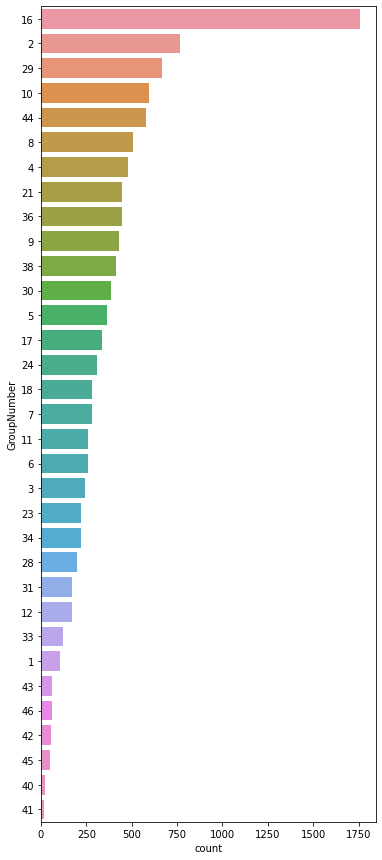

In [14]:
# Текущий номер группы животного

f, ax = plt.subplots(figsize=(6, 15))
a = df['Номер группы животного'].value_counts().reset_index()
a.rename({'index': 'GroupNumber', "Номер группы животного": 'count'}, axis=1, inplace=True)
a['GroupNumber'] = a['GroupNumber'].astype(str)
a.sort_values('count', ascending=False)
sns.barplot(x='count', y='GroupNumber', data=a)

<AxesSubplot:xlabel='count', ylabel='GroupNumber'>

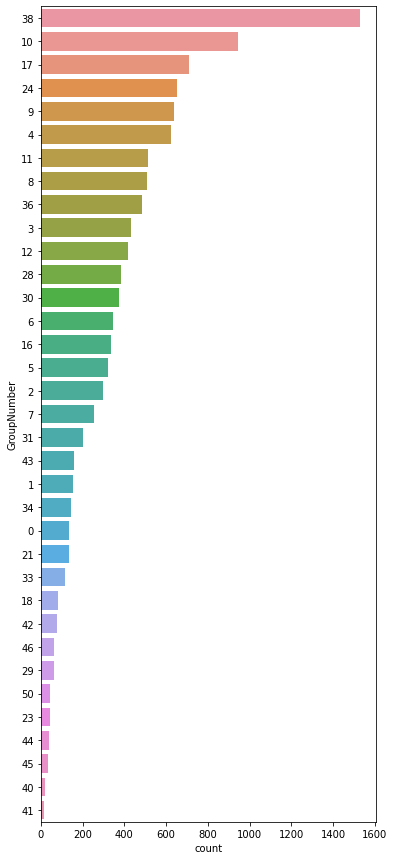

In [15]:
# Предыдущий номер группы животного

f, ax = plt.subplots(figsize=(6, 15))
a = df['Предыдущий номер группы животного'].value_counts().reset_index()
a.rename({'index': 'GroupNumber', "Предыдущий номер группы животного": 'count'}, axis=1, inplace=True)
a['GroupNumber'] = a['GroupNumber'].astype(str)
a.sort_values('count', ascending=False)
sns.barplot(x='count', y='GroupNumber', data=a)

Подумать про вещи типа

Количество больных болезнью Х коров в этом стойле <br>
Контактировала ли корова в прошлом с коровами с болезнью Х (Но это вся будет про историю болезни, а не её течение)<br>
В плане течения - находится ли корова во время болезни с какими-то другими больными коровами (эксплораторно посмотреть на это)<br> 
Убедиться, что нет data leak'а из-за учета номера группы (т.к. это может содержать информацию о выздоровлении)

### Событие, дни доения при событии, примечания события

Дни доения пока оставляем как есть <br>
События приводим к общему виду (к их кириллическому коду, т.к. таких кодов больше)
После этого создаём новые признаки - на основании примечаний событий

In [16]:
rename_mapping = {"ABORT":"АБОРТ",
"BRED":"ОСЕМЕН",
"DNB":"НЕОСЕМ",
"DRY":"СУХОСТ",
"FOOTRIM":"РАСЧКОП",
"FRESH":"ОТЕЛ",
"ILLMISC":"БОЛЕЗНЬ",
"KETOS":"КЕТОЗ",
"LAME":"ХРОМОТА",
"MAST":"МАСТИТ",
"METR":"МЕТРИТ",
"MOVE":"ПЕРЕВОД",
"NULSCM":"СО_СХЕМЫ",
"OPEN":"ЯЛОВАЯ",
"POT":"ПРОФОТ",
"RP":"ПОСЛЕД",
"SOLD":"ПРОДАНА",
"TOSCM":"НА_СХЕМУ",
"WEIGHT":"ВЕС",
"WELL":"ЗДОРОВА"}




df['Событие'] = df['Событие'].apply(lambda x: rename_mapping[x] if x in rename_mapping else x)

### События

**Комментарии к событиям и сами события окрашены в цвета (важность убывает, окрашено в наиболее важное)**
- <span style="background-color: #6f781f">Жёлтый цвет - нужно задать вопросы экспертам</span>
- <span style="background-color: blue">Синий цвет - необходимо дополнительно что-то проверить</span>
- <span style="background-color: green">Зелёный цвет - достаточно просто удалить событие (возможно, добавив дамми признаки из примечаний)</span>

#### <span style="background-color: #6f781f">Событие АБОРТ</span><br>

In [17]:
df[df['Событие'] == 'АБОРТ']

,Номер животного,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события
855,2028,1,FA,1,2020-02-03,0,0,3,3,АБОРТ,235,2022-07-04,94 ДНИ
870,3096,1,FA,1,2020-03-07,0,0,9,2,АБОРТ,193,2022-07-04,94 ДНИ
875,3145,1,MA,1,2020-03-12,0,45,8,8,АБОРТ,153,2022-07-04,95 ДНИ
882,3229,1,FA,1,2020-03-19,0,48,8,3,АБОРТ,192,2022-07-04,81 ДНИ
1256,903135,2,FA,1,2019-03-21,62,0,5,5,АБОРТ,194,2022-07-04,94 ДНИ
1295,906009,2,FA,1,2019-06-02,63,0,6,5,АБОРТ,158,2022-07-04,94 ДНИ
3352,901008,2,FA,1,2019-01-01,71,39,4,6,АБОРТ,157,2022-07-11,БЕЗ ЖТ
3361,901084,2,MA,1,2019-01-09,50,0,5,42,АБОРТ,276,2022-07-11,213 ДНИ
3392,904117,2,FA,1,2019-04-18,67,45,7,7,АБОРТ,155,2022-07-11,94 ДНИ
3801,912010,1,FA,1,2019-12-02,0,0,7,21,АБОРТ,236,2022-07-12,172 ДНИ


- <span style="background-color: #6f781f">Задать вопрос - Почему "дней стельности при событии" не совпадает с примечанием к событию АБОРТ</span><br>
- <span style="background-color: #6f781f">Задать вопрос - Что такое "БРАК"?</span>

#### <span style="background-color: green">Событие Болезнь</span>

In [18]:
df[df['Событие'] == 'БОЛЕЗНЬ']['Примечание события'].value_counts()

ГАСТРО3    56
ГАСТРО4    54
СУСТАВ     50
ГАСТРО2    43
ГАСТРО1    29
АБС1       25
ТОЩ        22
ПУТЫ       15
РИН2       15
УШИБ       14
РАНА       12
РОТА       10
ПНЕВМО1     7
БУР1_?      7
БУР1_       5
РИН         5
ПНЕВМО2     5
ТУГОДОЙ     4
КОЛИ        4
ПОНОС2      2
ТОЩ2        1
Name: Примечание события, dtype: int64

Убедимся в том, что эти примечание уникальны только для события "БОЛЕЗНЬ"

In [19]:
disease_notes = set(df[df['Событие'] == 'БОЛЕЗНЬ']['Примечание события'].unique())
disease_erroneous_mask = df[df['Событие'] != "БОЛЕЗНЬ"]['Примечание события'].apply(lambda x: x in disease_notes)
df[df['Событие'] != "БОЛЕЗНЬ"][disease_erroneous_mask]

,Номер животного,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события
3690,802119,3,FA,1,2018-02-18,88,0,44,3,НЕОСЕМ,8,2022-07-12,СУСТАВ
9134,607083,5,FA,1,2016-07-16,63,0,44,45,НЕОСЕМ,5,2022-07-26,СУСТАВ


- <span style="background-color: green">Похоже, что данные примечания не являются двусмысленными (значит можно просто создавать новые признаки из примечания события и удалять само событие)</span>
- <span style="background-color: green">Создать признак "Лечение идёт/Лечение завершено (возможно, завершено успешно/завершено неуспешно)"</span>

#### <span style="background-color: green">События ВАКВИРУС и ВАКЦИН</span>


Эти события можно объединить и рассматривать совместно

In [20]:
df['Событие'] = df['Событие'].apply(lambda x: "ВАКЦИН" if x == 'ВАКВИРУС' else x)

In [21]:
df[df['Событие'] == 'ВАКЦИН']['Примечание события'].value_counts()

ВИСТА       581
ЛЕПТО       523
СКОУ        292
КОГЛАВАК    281
ЛТФ         173
Name: Примечание события, dtype: int64

Проверяем, нет ли таких примечаний у других событий

In [22]:
vaccine_notes = df[df['Событие'] == 'ВАКЦИН']['Примечание события'].unique().flatten()
df[df['Событие'] != "ВАКЦИН"]['Примечание события'].isin(vaccine_notes).sum()

0

<span style="background-color: green">Похоже, что данные примечания не являются двусмысленными (значит можно просто создавать новые признаки из примечания события и удалять само событие)</span>

#### <span style="background-color: blue">Событие ВЕС</span>

Значение признака - вес коровы, смотрим на наличие пропусков или нестандартных значений

In [23]:
df[df['Событие'] == 'ВЕС']['Примечание события'].convert_dtypes().dtype, df[df['Событие'] == 'ВЕС']['Примечание события'].isna().sum()

(Int64Dtype(), 0)

Всё окс, смотрим на распределение

<AxesSubplot:xlabel='Примечание события'>

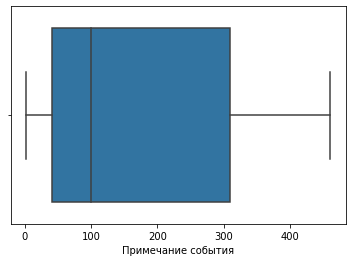

In [24]:
sns.boxplot(df[df['Событие'] == 'ВЕС']['Примечание события'])

- <span style="background-color: blue">Посмотреть, взвешивают ли только телят. Если только телят, всё равно можно использовать признак как прокси для будущего веса</span> 
- <span style="background-color: green">Создаём признак ВЕС</span> 
- <span style="background-color: green">Возможно, можно добавить категориальный признак 0: вес в норме, 1: избыток веса, 2: недостаток веса</span> <br>

#### <span style="background-color: blue">Событие ДЕФЕКТ</span> <br>

In [25]:
df[df['Событие'] == 'ДЕФЕКТ']['Примечание события']

Series([], Name: Примечание события, dtype: object)

<span style="background-color: blue">Такого признака нет, так что придётся потом дописывать обработку после предоставления полных даннных</span> <br>

#### <span style="background-color: #6f781f">Событие ЗДОРОВА</span>

Убедимся в том, что примечания уникальны только для события "ЗДОРОВА"

In [26]:
df[df['Событие'] == 'ЗДОРОВА']['Примечание события'].unique()
# что такое 910092?

array(['ХРОМОТА', 'ПРОЧИЕ', 'МАСТИТ', 'ГИНЕКОЛ', 'ПРОЧЕЕ', 'МОЛОДНЯК',
       'МАСТИТ,', 910092], dtype=object)

<span style="background-color: #6f781f">Уточнить, что "910092" - это код чего-то, а не ошибка в данных, иначе удалить это из дамми-категорий</span> <br>

In [27]:
healthy_cats = df[df['Событие'] == 'ЗДОРОВА']['Примечание события'].unique()
healthy_erroneous_mask = df[df['Событие'] != "ЗДОРОВА"]['Примечание события'].isin(healthy_cats)
df[df['Событие'] != "ЗДОРОВА"][healthy_erroneous_mask]

,Номер животного,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события
2190,5211,1,FA,1,2020-05-28,0,0,8,12,НЕОСЕМ,133,2022-07-08,ГИНЕКОЛ
4697,9066,1,FA,1,2020-09-10,0,0,21,21,НЕОСЕМ,9,2022-07-19,МАСТИТ
4783,9127,1,FA,3,2020-09-18,0,0,43,43,НЕОСЕМ,20,2022-07-17,МАСТИТ
4881,9201,1,MA,1,2020-09-24,0,0,21,21,НЕОСЕМ,2,2022-07-14,МАСТИТ
9108,606021,5,MA,1,2016-06-04,57,0,44,21,НЕОСЕМ,6,2022-07-28,МАСТИТ
9182,612062,4,MA,1,2016-12-12,63,0,44,21,НЕОСЕМ,16,2022-07-17,МАСТИТ
10007,810157,3,MA,1,2018-10-27,56,0,44,21,НЕОСЕМ,3,2022-07-17,МАСТИТ
10031,811024,3,MA,1,2018-11-04,63,0,44,2,НЕОСЕМ,24,2022-07-17,МАСТИТ
10180,812156,3,MA,1,2018-12-22,57,0,21,21,НЕОСЕМ,3,2022-07-18,МАСТИТ


<span style="background-color: green">Похоже, что данные примечания не являются двусмысленными (значит можно просто создавать новые признаки из примечания события и удалять само событие)</span> <br>

#### <span style="background-color: green">Событие КЕТОЗ</span>

Убедимся в том, что примечания уникальны только для события "КЕТОЗ"

In [28]:
keto_cats = df[df['Событие'] == 'КЕТОЗ']['Примечание события'].unique()
df[df['Событие'] != "КЕТОЗ"]['Примечание события'].isin(keto_cats).sum()

0

- <span style="background-color: green">Похоже, что данные примечания не являются двусмысленными (значит можно просто создавать новые признаки из примечания события и удалять само событие)</span> 
- <span style="background-color: blue">Проверить, когда образовывается кетоз (в частности, проверить возраст и количество дней после последнего отёла). Это часто возникает в первые 10 дней</span> <br>

#### <span style="background-color: blue">Событие МАСТИТ</span>


Убедимся в том, что примечания уникальны только для события "МАСТИТ"

In [29]:
mastit_cats = df[df['Событие'] == 'МАСТИТ']['Примечание события'].unique()
mastit_cats

array(['КМ3_3', 'КМ1_234', 'ТМ3_4', 'КМ1_34', 'КМ3_4', 'КМ6_4', 'КМ3_1',
       'КМ1_4', 'ТМ9_1', 'КМ3_13', 'ТМ9_3', 'КМ3_23', 'ТМ5_4', 'КМ1_23',
       'КМ1_3', 'КМ6_1', 'ТМ5_3', 'КМ5_3', 'КМ6_3', 'КМ1_12', 'КМ1_123',
       'КМ6_2,3', 'КМ1_1', 'КМ3_2', 'КМ1_1,4', 'ТМ1_3', 'КМ1_1,3',
       'КМ1_2,3', 'КМ1_1_4', 'КМ5_2,3', 'КМ1_1,2', 'КМ5_4', 'КМ1_2',
       'ТМ2_1', 'СКМ6_1_4', 'КМ1_3,4', 'ТМ2_4', 'ТМ1_4', 'КМ6_1,4',
       'КМ2_2', 'МВ', 'КМ1_134', 'КМ3_1,4', 'СКМ6_2', 'КМ6_2', 'СКМ6_1,4',
       'ТМ2_2', 'КМ2_1,2', 'КМ3_124', 'СКМ6_1,3', 'КМ5_3,4', 'ТМ2_3,4',
       'КМ3_2,4', 'КМ6_1_4', 'КМ4_1,4', 'ТМ3_2', 'ТМ5_1', 'КМ3_1,2',
       'КМ6_34'], dtype=object)

- <span style="background-color: blue">Проверить, было ли такое, что у коров после лечения мастита при поражении каких-то сосков развивался мастит на других </span>
- <span style="background-color: blue">Посмотреть, могут ли разные соски одновременно лечиться разными препаратами (возможно, уже на трейне на хакатоне)</span>
- <span style="background-color: blue">Посмотреть, образовывается ли мастит в период пауз доения чаще</span>
- <span style="background-color: green">Добавить признаки "Протокол лечения" + ("Количество пораженных сосков" либо 4 признака на пораженную конечность). В таком случае 0 везде будут отвечать отсутствию мастита</span>

In [30]:
df[df['Событие'] != 'МАСТИТ']['Примечание события'].isin(mastit_cats).sum()

0

<span style="background-color: green">Похоже, что данные примечания не являются двусмысленными (значит можно просто создавать новые признаки из примечания события и удалять само событие)</span> <br>

#### <span style="background-color: green">Событие МЕТРИТ</span>

Убедимся в том, что примечания уникальны только для события "МЕТРИТ"

In [31]:
metrit_cats = df[df['Событие'] == 'МЕТРИТ']['Примечание события'].unique() # всего 2
df[df['Событие'] != 'МЕТРИТ']['Примечание события'].isin(metrit_cats).sum()

0

<span style="background-color: green">Похоже, что данные примечания не являются двусмысленными (значит можно просто создавать новые признаки из примечания события и удалять само событие)</span> <br>

#### <span style="background-color: #6f781f">Событие НА_СХЕМУ</span>

In [32]:
on_scheme_df = df[df['Событие'] == 'НА_СХЕМУ']['Примечание события'].value_counts()


- <span style="background-color: #6f781f">Задать вопрос насчёт редких схем гормональной стимуляции</span>
- <span style="background-color: green">Добавить признак "Номер схемы"</span>

#### <span style="background-color: #6f781f">Событие НЕОСЕМ</span>

Убедимся в том, что примечания уникальны только для события "МЕТРИТ"

In [33]:
df[df['Событие'] == 'НЕОСЕМ']['Примечание события'].unique()

array(['ВЫМЯ', '-', 'МЕЛКАЯ', 'ВОСПР', 'НОГИ', 'ГИНЕКОЛ', 'НОГИПУТЫ',
       'НАДОЙ', 'АТП', 'АБЦЕС', 'БРАК', 'СУСТАВ', 'ЗООТЕХ', 'ABC',
       'МАСТИТ', 'ПНЕВМО', 'ЗДОРОВЬЕ'], dtype=object)

In [34]:
df[df['Событие'] == 'НЕОСЕМ']['Примечание события'].value_counts()

ВОСПР       17
-           16
ВЫМЯ        10
НОГИ         8
МАСТИТ       8
ЗООТЕХ       6
ПНЕВМО       3
СУСТАВ       2
НАДОЙ        2
ABC          1
АТП          1
БРАК         1
АБЦЕС        1
НОГИПУТЫ     1
ГИНЕКОЛ      1
МЕЛКАЯ       1
ЗДОРОВЬЕ     1
Name: Примечание события, dtype: int64

- <span style="background-color: #6f781f">Задать вопрос насчёт того, почему есть пропуски в данных</span>

In [35]:
neosem_cats = set(df[df['Событие'] == 'НЕОСЕМ']['Примечание события'].unique())
neosem_cats.remove("-")
neosem_erroneous_cats = df[df['Событие'] != 'НЕОСЕМ']['Примечание события'].isin(neosem_cats) # 328
df[df['Событие'] != "НЕОСЕМ"][neosem_erroneous_cats].groupby("Событие").count()


,Номер животного,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Дни доения при событии,Дата события,Примечание события
Событие,,,,,,,,,,,,
АБОРТ,1,1,1,1,1,1,1,1,1,1,1,1
БОЛЕЗНЬ,50,50,31,50,50,50,50,50,50,50,50,50
ЗДОРОВА,271,271,271,271,271,271,271,271,271,271,271,271
ЯЛОВАЯ,6,6,5,6,6,6,6,6,6,6,6,6


C болезнью и выздоровлением всё понятно (рассмотрено выше). Посмотрим на события ЯЛОВАЯ и АБОРТ

In [36]:
fff = df[df['Событие'] != "НЕОСЕМ"][neosem_erroneous_cats]
fff[fff['Событие'].isin({"ЯЛОВАЯ", "АБОРТ"})]

,Номер животного,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события
3306,806121,3,MA,1,2018-06-24,68,0,4,43,ЯЛОВАЯ,90,2022-07-11,БРАК
3360,901084,2,MA,1,2019-01-09,50,0,5,42,ЯЛОВАЯ,276,2022-07-11,БРАК
3809,1008,1,FA,1,2020-01-01,0,0,5,12,ЯЛОВАЯ,246,2022-07-25,БРАК
5421,12171,0,NaN,0,2020-12-20,0,0,28,28,ЯЛОВАЯ,577,2022-07-20,ВОСПР
9118,606120,4,MD,1,2016-06-20,65,0,5,3,ЯЛОВАЯ,261,2022-07-18,БРАК
9196,701062,4,FA,1,2017-01-09,55,0,42,50,ЯЛОВАЯ,96,2022-07-18,БРАК
9605,803155,3,FA,1,2018-03-26,62,0,7,42,АБОРТ,258,2022-07-25,БРАК


<span style="background-color: green">Можно добавить бинарный признак "Фертильна" (Если не было события "НЕОСЕМ")</span>

#### <span style="background-color: green">Событие ОСЕМЕН</span>

Убедимся в том, что примечания уникальны только для события "ОСЕМЕН"

In [37]:
df[df['Событие'] == 'ОСЕМЕН']['Примечание события'].unique()

array(['1H15132', '1H15184', '501H14018', '1H15689', '1H15461',
       '501H15515', '7H14578', '501H15681', '614H15481', '507H15248',
       '1H15879', 'ANSVER', 'FEIM'], dtype=object)

In [38]:
osemen_cats = set(df[df['Событие'] == 'ОСЕМЕН']['Примечание события'].unique())
df[df['Событие'] != 'ОСЕМЕН']['Примечание события'].isin(osemen_cats).sum()

0


- <span style="background-color: green">Создать категории для кодов семени <br>
- <span style="background-color: blue">Можно посмотреть на то, являются ли какие-то коды семян более "дефектными" (возможно, для каких-то коров)<br>
- <span style="background-color: #6f781f">Спросить, являются ли коды ANSVER и FEIM нормальными кодами, т.к. они выбиваются из общей картины<br>

#### <span style="background-color: blue">Событие ОТЕЛ</span>

In [39]:
# проверка на то, обнуляется ли день беременности (да)
df[df['Событие'] == 'ОТЕЛ']['Дней стельности при событии'].sum()

0

- <span style="background-color: blue">Если **Номер лактации** меняется нормально после наступления события ОТЕЛ, можно просто удалить признак (это нужно проверить)</span>

#### <span style="background-color: blue">Событие ПАЛА</span>

In [40]:
df[df['Событие'] == 'ПАЛА']

,Номер животного,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события
803,901122,2,MA,1,2019-01-14,65,0,3,6,ПАЛА,253,2022-07-03,ПАЛА ; Болезни ЖКТ ; УВЗ3
2270,21672,0,NaN,0,2021-10-12,0,0,34,34,ПАЛА,269,2022-07-08,ПАЛА ; Травмы ; УВЗ5
7667,22547,0,NaN,0,2022-03-12,0,0,38,38,ПАЛА,125,2022-07-15,ПАЛА ; Репродукция ; УВЗ6
7717,22726,0,NaN,0,2022-04-23,0,0,38,38,ПАЛА,92,2022-07-24,ПАЛА ; Болезни ЖКТ ; УВЗ3
8117,22912,0,NaN,0,2022-05-29,0,0,38,38,ПАЛА,62,2022-07-30,ПАЛА ; Прочее ; УВЗ8
9101,606008,4,MA,1,2016-06-02,68,224,17,7,ПАЛА,284,2022-07-29,ПАЛА ; Прочее ; УВЗ8
9477,712063,3,MA,1,2017-12-08,68,0,43,3,ПАЛА,129,2022-07-15,ПАЛА ; Травмы ; УВЗ5


- <span style="background-color: blue">Посмотреть, применялись ли протоколы лечения мастита к каким-то коровам, которые в итоге умерли</span>
- <span style="background-color: blue">Если есть итог лечения у таких коров, посмотреть, не является ли это причиной неудачного лечения (если нет итога лечения у таких коров - или коров с итогом лечения слишком мало - возможно, стоит просто дропнуть признак</span>

#### <span style="background-color: blue">Событие ПАРЕЗ</span>

In [41]:
df[df['Событие'] == 'ПАРЕЗ']

,Номер животного,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события
2101,808129,3,FA,1,2018-08-21,55,0,44,18,ПАРЕЗ,1,2022-07-07,ПАРЕЗ
2542,810054,3,MAMA,1,2018-10-12,57,0,44,18,ПАРЕЗ,0,2022-07-08,ПАРЕЗ
2722,608159,5,MA,2,2016-08-27,58,0,44,18,ПАРЕЗ,0,2022-07-09,ПАРЕЗ
3243,707143,4,MA,1,2017-07-26,60,0,44,18,ПАРЕЗ,0,2022-07-11,ПАРЕЗ
5015,10087,1,FA,1,2020-10-12,0,0,44,8,ПАРЕЗ,1,2022-07-31,ПАРЕЗ


Убедимся в том, что примечания уникальны только для события "ПАРЕЗ"

In [42]:
df_not_parez = df[df['Событие'] != 'ПАРЕЗ']
df_not_parez[df_not_parez['Примечание события'] == "ПАРЕЗ"]

,Номер животного,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события


- <span style="background-color: green">Можно добавить признаки ПАРЕЗ + ПАРЕЗ_ВЫЛЕЧЕН</span>
- <span style="background-color: blue">Посмотреть, влияет ли на это количество беременностей</span>

#### <span style="background-color: #6f781f">Событие ПЕРЕВОД</span>

In [43]:
df[df['Событие'] == 'ПЕРЕВОД']

,Номер животного,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события
18,3297,1,FD,3,2020-03-25,0,50,8,8,ПЕРЕВОД,95,2022-07-01,F008T009
30,4133,1,MA,1,2020-04-18,0,0,8,3,ПЕРЕВОД,137,2022-07-01,F008T003
45,5057,1,FA,1,2020-05-09,0,0,6,6,ПЕРЕВОД,141,2022-07-01,F006T005
58,5144,1,MA,1,2020-05-19,0,50,8,8,ПЕРЕВОД,121,2022-07-01,F008T009
62,5154,1,FA,1,2020-05-20,0,119,6,6,ПЕРЕВОД,131,2022-07-01,F006T007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11535,912231,1,FA,1,2019-12-27,0,173,6,12,ПЕРЕВОД,224,2022-07-15,F006T007
11541,912253,1,FA,1,2019-12-30,0,250,6,17,ПЕРЕВОД,273,2022-07-23,F006T007
11546,912253,1,FA,1,2019-12-30,0,250,7,17,ПЕРЕВОД,277,2022-07-27,F007T003
11547,912253,1,FA,1,2019-12-30,0,250,17,17,ПЕРЕВОД,280,2022-07-30,F017T045


In [44]:
df[df['Номер животного'] == 3297]

,Номер животного,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события
17,3297,1,FD,3,2020-03-25,0,50,9,8,НА_СХЕМУ,95,2022-07-01,9
18,3297,1,FD,3,2020-03-25,0,50,8,8,ПЕРЕВОД,95,2022-07-01,F008T009


Все преобразования относятся к признакам "Номер группы" и "Предыдущий номер" (см. выше)

<span style="background-color: #6f781f">Задать вопрос о том, переводят ли коров из помещения в помещение по каким-то причинам, отличным от заболеваний? (Как было обозначено, для заболевших коров отведены помещения 3 и 43)</span>

#### <span style="background-color: blue">Событие ПОСЛЕД</span>

In [45]:
df[df['Событие'] == 'ПОСЛЕД']

,Номер животного,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события
410,807037,3,FA,1,2018-07-07,58,0,21,2,ПОСЛЕД,6,2022-07-01,ПОСЛЕД
668,910186,2,FA,1,2019-10-29,59,0,21,10,ПОСЛЕД,6,2022-07-02,ПОСЛЕД
784,809002,3,FA,1,2018-09-01,59,0,44,10,ПОСЛЕД,0,2022-07-03,ПОСЛЕД2
787,809026,3,MAMA,1,2018-09-04,59,0,44,44,ПОСЛЕД,0,2022-07-03,ПОСЛЕД2
1327,908185,2,FA,1,2019-08-29,54,0,21,21,ПОСЛЕД,6,2022-07-04,ПОСЛЕД
1524,607011,5,FD,1,2016-07-02,61,0,44,18,ПОСЛЕД,0,2022-07-05,ПОСЛЕД2
2012,8136,1,FA,1,2020-08-17,0,0,21,8,ПОСЛЕД,6,2022-07-07,ПОСЛЕД
2107,811033,3,MD,1,2018-11-05,28,0,44,10,ПОСЛЕД,0,2022-07-07,ПОСЛЕД2
2137,910078,2,FA,1,2019-10-12,56,0,44,3,ПОСЛЕД,0,2022-07-07,ПОСЛЕД2
2638,908161,2,MA,1,2019-08-25,58,0,21,10,ПОСЛЕД,6,2022-07-08,ПОСЛЕД


Проверяем наличие таких же примечаний в других событиях

In [46]:
posled_cats = df[df['Событие'] == 'ПОСЛЕД']['Примечание события'].unique()
df[df['Событие'] != 'ПОСЛЕД']['Примечание события'].isin(posled_cats).sum()

0

- <span style="background-color: green">Удалить признак и добавить дамми для его уникальных значений</span>
- <span style="background-color: blue">Посмотреть на вес плода у коров с задержкой последа (не выше ли он в среднем)</span>

#### <span style="background-color: blue">Событие ПРОДАНА</span>

In [47]:
df[df['Событие'] == 'ПРОДАНА']

,Номер животного,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события
129,8214,1,MA,1,2020-08-24,0,0,44,18,ПРОДАНА,2,2022-07-01,ПРОДАНА ; Прочее ; УВЗ7
155,21621,0,NaN,0,2021-10-04,0,0,34,34,ПРОДАНА,270,2022-07-01,ПРОДАНА ; Травмы ; УВЗ5
370,710036,4,FA,1,2017-10-09,61,0,44,2,ПРОДАНА,18,2022-07-01,ПРОДАНА ; Болезни ЖКТ ; УВЗ3
437,901140,2,MA,1,2019-01-17,71,0,42,5,ПРОДАНА,197,2022-07-01,ПРОДАНА ; Пневмония ; УВЗ1
444,903077,2,FA,1,2019-03-13,54,126,1,1,ПРОДАНА,186,2022-07-01,ПРОДАНА ; Травмы ; УВЗ5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11093,910089,1,FA,1,2019-10-13,0,0,43,43,ПРОДАНА,283,2022-07-13,ПРОДАНА ; Причина 12 ; УВЗ12
11177,910170,1,FA,1,2019-10-26,0,184,42,8,ПРОДАНА,282,2022-07-17,ПРОДАНА ; Травмы ; УВЗ5
11395,911209,1,FA,1,2019-11-26,0,0,5,5,ПРОДАНА,323,2022-07-13,ПРОДАНА ; Причина 12 ; УВЗ12
11420,911236,2,FA,1,2019-11-29,41,0,44,45,ПРОДАНА,2,2022-07-15,ПРОДАНА ; Травмы ; УВЗ5


- <span style="background-color: blue">Посмотреть, применялись ли протоколы лечения мастита к каким-то коровам, которые были проданы</span>
- <span style="background-color: blue">Если есть итог лечения у таких коров, посмотреть, не является ли это причиной неудачного лечения (если нет итога лечения у таких коров - или коров с итогом лечения слишком мало - возможно, стоит просто дропнуть признак</span>

#### <span style="background-color: blue">Событие ПРОФОТ</span>

In [50]:
df[df['Событие'] == 'ПРОФОТ']['Примечание события'].unique()

array(['ПРОФ2'], dtype=object)

Проверяем наличие таких же примечаний в других событиях

In [53]:
df[(df['Событие'] != 'ПРОФОТ') & (df['Примечание события'] == 'ПРОФ2')]

,Номер животного,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события


- <span style="background-color: green">Заменить признак на бинарный (была проведена профилактика послеотельных осложнений)</span>
- <span style="background-color: blue">Убедиться в том, что этот признак не коррелирует с каким-то другим (напр., все коровы с послеродовыми осложнениями прошли через профот, в таком случае наличие такого заболевания будет обязательно означать прохождение профилактики). В частности, можно смотреть на ПАРЕЗ, КЕТОЗ, ПОСЛЕД</span>

#### <span style="background-color: #6f781f">Событие РАСЧКОП</span>

In [54]:
df[df['Событие'] == 'РАСЧКОП']['Примечание события'].unique()

array(['РДК', 'КАН'], dtype=object)


- <span style="background-color: #6f781f">Задать вопрос насчёт того, проводится ли обрезка копыт после какого-то события</span><br>
Если обрезка копыт коррелирует с одним из этих мероприятий, может оказаться, что обрезка корррелирует с какой-то болезнью не сама по себе, а через что-то:
- <span style="background-color: blue">Посмотреть на то, проводилась ли обрезка копыт после перевода из одного помещения в другое</span>
- <span style="background-color: blue">Посмотреть на то, в каком возрасте проводилась обрезка коров </span>

Также:
- <span style="background-color: blue">Посмотреть на то, сильнее ли какие-то осложнения в зависимости от того, проводилась ли обрезка копыт или нет (и кем проводилась). Если есть зависимость, можно заменить этот признак на 3 категориальных (не проводилась, ФИО1, ФИО2)</span>

#### <span style="background-color: #6f781f">Событие СО_СХЕМЫ</span>

In [58]:
df[df['Событие'] == 'СО_СХЕМЫ']

,Номер животного,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события
4561,8159,1,FA,1,2020-08-19,0,0,1,1,СО_СХЕМЫ,62,2022-07-25,-
9776,807075,3,FA,1,2018-07-14,58,0,44,2,СО_СХЕМЫ,23,2022-07-25,-


- <span style="background-color: #6f781f">Спросить у экспертов, почему в датасете снятие со схемы гормональной стимуляции произошло только для двух коров, хотя все животные становятся на схему. Это обусловлено размером датасета или снятие со схемы - это что-то нетипичное?</span>
- <span style="background-color: blue">Посмотреть, есть ли какая-то разница в эффективности протоколов лечения для тех коров, которые на схеме vs для тех, которые уже не на схеме (это уже на трейне во время хакатона)</span>
- <span style="background-color: green">Если всё нормально по двум пунктам выше, добавить бинарный признак "Снята с гормональной стимуляции"</span>

#### <span style="background-color: #6f781f">Событие СТЕЛН</span>

In [59]:
df[df['Событие'] == 'СТЕЛН']

,Номер животного,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события
852,1103,1,FA,1,2020-01-11,0,82,9,9,СТЕЛН,196,2022-07-04,33 ДНИ
854,1235,1,MA,1,2020-01-25,0,129,7,42,СТЕЛН,159,2022-07-04,95 ДНИ
857,2098,1,FA,1,2020-02-09,0,143,9,9,СТЕЛН,199,2022-07-04,94 ДНИ
858,2099,1,FA,1,2020-02-09,0,143,7,8,СТЕЛН,193,2022-07-04,94 ДНИ
859,2109,1,FA,1,2020-02-10,0,143,9,1,СТЕЛН,153,2022-07-04,94 ДНИ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11536,912232,1,MD,3,2019-12-27,0,131,5,3,СТЕЛН,223,2022-07-25,94 ДНИ
11537,912239,1,FA,1,2019-12-28,0,250,6,6,СТЕЛН,311,2022-07-25,213 ДНИ
11543,912253,1,FA,1,2019-12-30,0,250,7,17,СТЕЛН,275,2022-07-25,213 ДНИ
11553,912262,1,FA,1,2019-12-31,0,76,9,9,СТЕЛН,249,2022-07-18,32 ДНИ



- <span style="background-color: #6f781f">Задать вопрос насчёт того, почему "дней стельности при событии" отличается от примечания к событию СТЕЛН (дней вынашивания плода)</span><br>
- <span style="background-color: #6f781f">Задать вопрос насчёт того, как часто проводится проверка на стельность для отдельно взятой коровы</span><br>

#### <span style="background-color: #6f781f">Событие СТЕЛНДО</span>

In [60]:
df[df['Событие'] == 'СТЕЛНДО']

,Номер животного,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события


- <span style="background-color: #6f781f">См. блок "СТЕЛН"</span><br>

#### <span style="background-color: green">Событие СУХ2</span>

In [66]:
df[df['Событие'] == 'СУХ2']

,Номер животного,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события
1405,7063,0,NaN,1,2020-07-10,0,272,11,11,СУХ2,725,2022-07-05,-
1408,7126,0,NaN,1,2020-07-16,0,270,11,11,СУХ2,719,2022-07-05,-
1411,7140,0,NaN,1,2020-07-19,0,266,11,11,СУХ2,716,2022-07-05,-
1412,7157,0,NaN,1,2020-07-20,0,275,11,11,СУХ2,715,2022-07-05,-
1415,7162,0,NaN,1,2020-07-21,0,279,11,11,СУХ2,714,2022-07-05,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11505,912133,1,FA,1,2019-12-17,0,276,17,17,СУХ2,312,2022-07-19,-
11512,912153,1,FA,1,2019-12-19,0,270,45,18,СУХ2,309,2022-07-13,-
11514,912167,1,FA,1,2019-12-21,0,278,17,17,СУХ2,313,2022-07-26,-
11529,912224,1,MA,1,2019-12-27,0,276,17,17,СУХ2,314,2022-07-26,-


- <span style="background-color: green">Бинарный признак "во второй фазе сухостоя"</span>

#### <span style="background-color: blue">Событие СУХОСТ</span>

In [69]:
df[df['Событие'] == 'СУХОСТ']['Примечание события'].value_counts()

CEBA    164
-        21
Name: Примечание события, dtype: int64

- <span style="background-color: blue">Посмотреть, влияет ли применение препарата Велактис (СЕВА) на рейт заболеваемости и тяжесть</span><br>
- <span style="background-color: green">Добавить признак "В первой фазе сухостоя"</span><br>

#### <span style="background-color: blue">Событие ХРОМОТА</span>

In [71]:
df[df['Событие'] == 'ХРОМОТА']['Примечание события'].value_counts()  

H1_3       11
HP2_3       9
H2_3        8
HP2_4       8
H1_4        7
H2_4        6
V3_3        3
V1_4        3
V3_4        3
V2_4        3
N2_2        3
АТ          3
HP2_3,4     2
H1_34       2
HP2_2       2
M1_34       2
H2_34       2
HP2_34      2
M1_3        1
H1_2        1
H2_3,4      1
HP1_2       1
N2_3,4      1
N3_3        1
H1_3,4      1
M1_4        1
N1_3        1
HP1_34      1
V1_3        1
N1_3,4      1
Name: Примечание события, dtype: int64

- <span style="background-color: green">Добавить признак "есть хромота"</span><br>
ИЛИ
- <span style="background-color: green">Добавить признаки "Протокол лечения" + ("Количество пораженных конечностей" либо 4 признака на пораженную конечность). В таком случае 0 везде будут отвечать отсутствию хромоты</span>
- <span style="background-color: blue">Посмотреть, могут ли разные конечности лечиться разными препаратами</span>

#### <span style="background-color: #6f781f">Событие ЯЛОВАЯ</span>

- <span style="background-color: green">Добавить бинарный признак "Яловая"</span>
- <span style="background-color: #6f781f">Задать вопрос насчёт того, что такое БРАК</span>
- <span style="background-color: #6f781f">Задать вопрос насчёт того, что такое ВОСПР</span>

### Мысли

Можно не рассматривать каждую корову отдельно, а рассматривать только вектор коровы в течение истории болезни - так и данных будет больше